# Curve fitting LSQ 4 methods

In [4]:
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt


In [5]:
# generate x and y
x = np.linspace(0, 1, 101)
y = 1 + x + x * np.random.random(len(x))

In [6]:
# assemble matrix A
A = np.vstack([x, np.ones(len(x))]).T

# turn y into a column vector
y = y[:, np.newaxis]

In [7]:
# Direct least square regression
alpha = np.dot((np.dot(np.linalg.inv(np.dot(A.T,A)),A.T)),y)
print(alpha)

[[1.45616912]
 [1.01592146]]


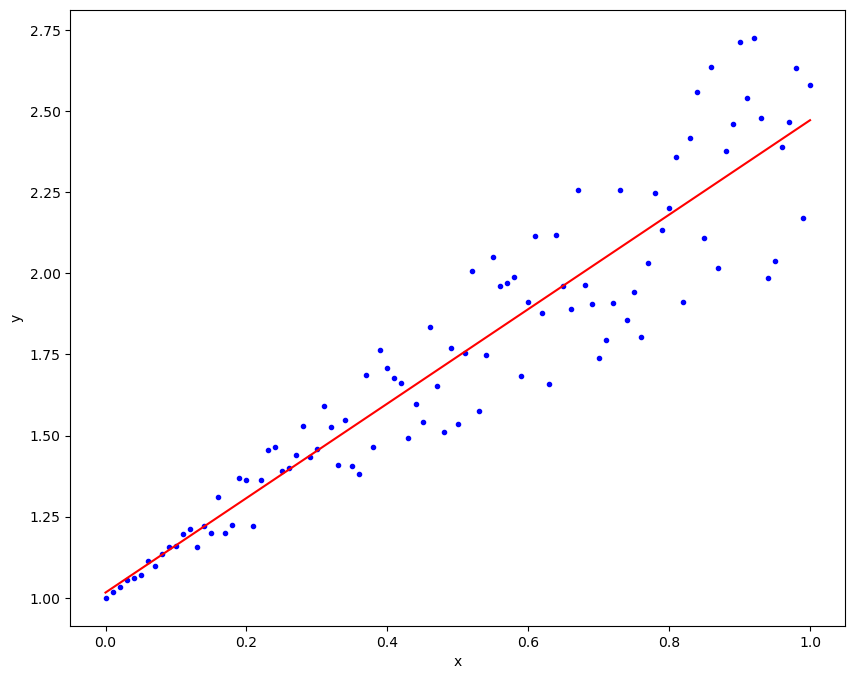

In [8]:
# plot the results
plt.figure(figsize = (10,8))
plt.plot(x, y, 'b.')
plt.plot(x, alpha[0]*x + alpha[1], 'r')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

### Using PseudoInverse

In [9]:
pinv = np.linalg.pinv(A)
alpha = pinv.dot(y)
print(alpha)

[[1.45616912]
 [1.01592146]]


In [10]:
alpha = np.linalg.lstsq(A, y, rcond=None)[0]
print(alpha)

[[1.45616912]
 [1.01592146]]


# Scipy -- optimize.curvefit

In [11]:
# generate x and y
x = np.linspace(0, 1, 101)
y = 1 + x + x * np.random.random(len(x))

In [12]:
def func(x, a, b):
    y = a*x + b
    return y

alpha = optimize.curve_fit(func, xdata = x, ydata = y)[0]
print(alpha)

[1.53187874 0.99051036]


# ONLY JOB - Residual Function

In [ ]:
def residuals(p, x, y):
    # p = [a, b, c]
    a, b, c = p
    # model prediction:
    y_pred = a + b * np.exp(c * x)
    # residual = prediction minus measured
    return y_pred - y    # returns an array of length len(x)


In [ ]:
from scipy.optimize import least_squares

res = least_squares(
    residuals,      # your function
    p0,             # initial guess
    args=(x_data, y_data),        # extra data you pass to residuals()
    bounds=([-np.inf, 0, -np.inf], np.inf),   # optional
    loss='linear'   # or 'soft_l1', 'huber', etc.
)
